# モジュールインポート

In [1]:
# 必要なライブラリのインポート

import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import seaborn as sns
import math
from scipy import stats
import cv2
from PIL import Image
import os
%matplotlib inline

In [2]:
# ヘルパー関数の定義

def get_label_idxs(labels: list, t_mnist: np.ndarray) -> np.ndarray:
    # 長さ60000のt_mnistについて，値が指定したラベルのうちのいずれかであるかのboolean arrayを取ってくる
    label_bool = np.any([t_mnist==label for label in labels], axis=0)
    # Trueである要素のインデックスを得る
    label_idxs = np.where(label_bool)[0]

    return label_idxs


def transforms(data_all: np.ndarray, flatten=True, binarize=True) -> np.ndarray:
    # 範囲を0~255から0~1にし，平坦化したあと，閾値0.5で0,1のバイナリにする
    data_all = data_all.astype(np.float64) / 255
    if flatten:
        data_all = data_all.reshape((data_all.shape[0], -1))
    if binarize:
        data_all = (data_all > 0.5).astype(np.uint8)

    return data_all

In [3]:
dir_path = "SkinData/1/"

files = os.listdir(dir_path)
# print(files)
image = Image.open(f"{dir_path}image40.png")

# 画像をNumPy配列に変換
x_mnist = np.array(image)

for i, file in enumerate(files):
    # 画像ファイルを開く
    image = Image.open(f"{dir_path}{file}")

    # 画像をNumPy配列に変換
    image_array = np.array(image)
    x_mnist = np.concatenate([x_mnist, image_array])
t_mnist = np.array([1 for i in range(x_mnist.shape[1])])
print(x_mnist)
print(t_mnist)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [4]:
NUM_SAMPLES = 1200

# (x_mnist, t_mnist), _ = mnist.load_data()
print(f"x_mnist: {x_mnist}, t_mnist: {t_mnist}")

labels = [1]

label_idxs = get_label_idxs(labels, t_mnist)
print(label_idxs)

data_all = []
for i, file in enumerate(files):
    image = Image.open(f"{dir_path}{file}")
    image_array = np.array(image)
    data_all.append(image_array)

data_all = np.array(data_all)

x_mnist: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]], t_mnist: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


<Axes: >

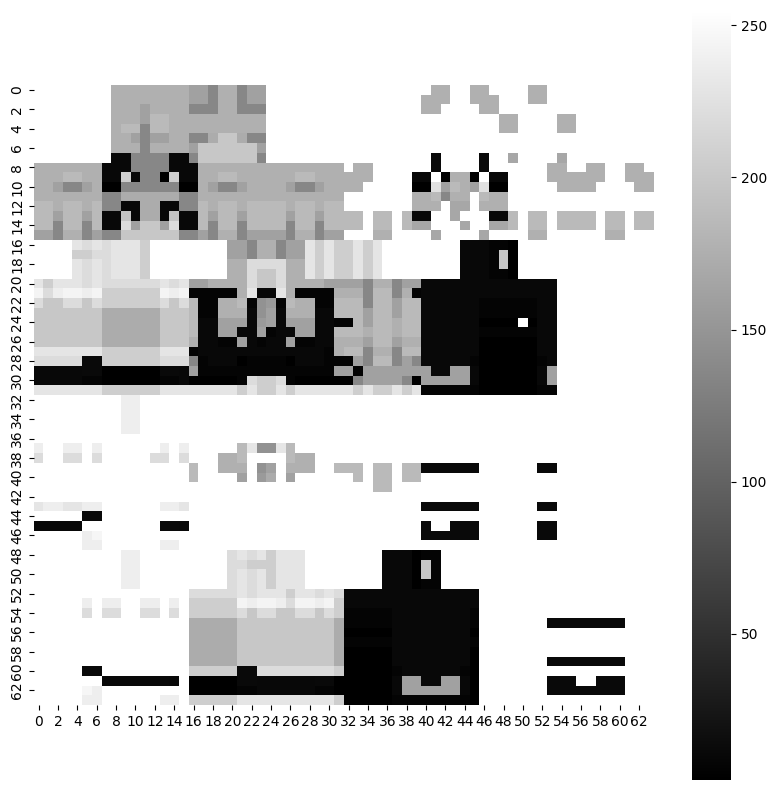

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_all[0], cmap='gray', fmt='d', annot_kws={"fontsize":8}, square=True)

In [6]:
binary_data = transforms(data_all)
print(f"binary_data: {binary_data.shape}, set {np.unique(binary_data)}")

binary_data: (49, 4096), set [0 1]


0の回数:  0
1の回数:  49


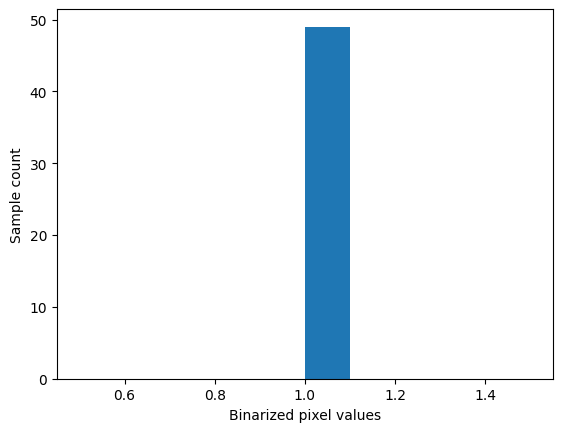

In [7]:
TARGET_PIXEL = 157

binary_pixel = binary_data[:, TARGET_PIXEL] # ( 600, )

print('0の回数: ', len(binary_pixel) - sum(binary_pixel))
print('1の回数: ', sum(binary_pixel))

plt.hist(binary_pixel)
plt.xlabel("Binarized pixel values")
plt.ylabel("Sample count")
plt.show()

mu_hats: (4096,)
0の回数:  0
1の回数:  1200


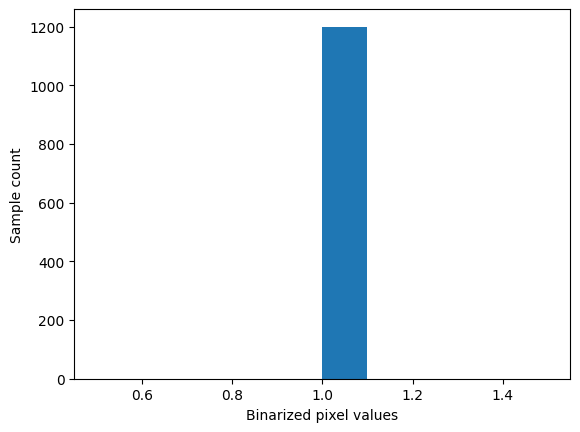

In [8]:
mu_hats = np.mean(binary_data, axis=0) # ( 784, )
print(f'mu_hats: {mu_hats.shape}')

# TARGET_PIXELのmu_hatをパラメータとするベルヌーイ分布からデータを生成する
sampled_data = stats.bernoulli.rvs(p=mu_hats[TARGET_PIXEL], size=NUM_SAMPLES)
print('0の回数: ', len(sampled_data) - sum(sampled_data))
print('1の回数: ', sum(sampled_data))

plt.hist(sampled_data)
plt.xlabel("Binarized pixel values")
plt.ylabel("Sample count")
plt.show()

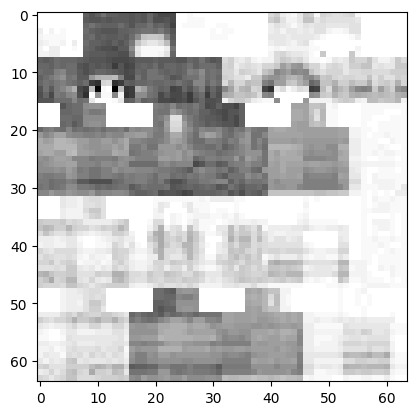

In [9]:
plt.imshow(mu_hats.reshape(64, 64), cmap="gray")

mu_hats_reshaped = mu_hats.reshape(64, 64)
mu_hats_pixels = (mu_hats_reshaped * 255).astype(np.uint8)
image = Image.fromarray(mu_hats_pixels, mode='L')  # mode='L' はグレースケール画像を指定

# 画像を保存
image.save('ai.png')

In [10]:
# NUM_SAMPLES = 1200

# # (x_mnist, t_mnist), _ = mnist.load_data()
# print(f"x_mnist: {x_mnist}, t_mnist: {t_mnist}")

# labels = [1]

# label_idxs = get_label_idxs(labels, t_mnist)
# print(label_idxs)

# data_all = []
# for i, file in enumerate(files):
#     image = Image.open(f"{dir_path}{file}")
#     image_array = np.array(image)
#     data_all.append(image_array)

# data_all = np.array(data_all)
# print(f"data_all: {data_all.shape}")

# # 範囲を0~255から0~1にし，平坦化したあと，閾値0.5で0,1のバイナリにする
# binary_data = transforms(data_all)
# print(f"binary_data: {binary_data.shape}, set {np.unique(binary_data)}")


In [11]:
# float型では、(大体)1e-323未満の値は精度の問題で0.0となり、
# 対数を取ると -inf となるので下限を抑えておく
def np_log(x):
    return np.log(np.clip(a=x, a_min=1e-323, a_max=1e+10))

# ベルヌーイ分布の対数尤度を計算する関数
def log_bernoulli_density(x, mu): # x: ( 784, ), mu: ( 784, )
    log_p = x * np_log(mu) + (1 - x) * np_log(1 - mu) # ( 784, )
    log_p = np.sum(log_p)
    return log_p

In [12]:
# 全てのデータ点を用いた，混合ベルヌーイ分布に対する対数尤度を計算する関数
def log_likelihood(binary_data, mu_list, pi_list):
    # binary_data: ( 1800, 784 ), mu_list: [ (784), (784), (784) ], pi_list: ( 3, )
    log_likely_all = 0
    for data in binary_data:
        likely = 0
        for k in range(len(pi_list)):
             likely += pi_list[k] * np.exp(log_bernoulli_density(data, mu_list[k]))
        log_likely_all += np_log(likely)

    return log_likely_all

In [13]:
# 負担率を計算する関数
def responsibility(data_all, mu_list, pi_list):
    gamma_mat = np.zeros((data_all.shape[0], len(pi_list))) # ( 1800, 3 )
    for i in range(gamma_mat.shape[0]):
        for k in range(gamma_mat.shape[1]):
            gamma_mat[i][k] = log_bernoulli_density(data_all[i], mu_list[k])
        gamma_mat[i] -= np.max(gamma_mat[i])
        gamma_mat[i] = pi_list * np.exp(gamma_mat[i])
        gamma_mat[i] /= np.sum(gamma_mat[i])
    return gamma_mat

Iteration: 0, log_likelihood: -743.7469247408218


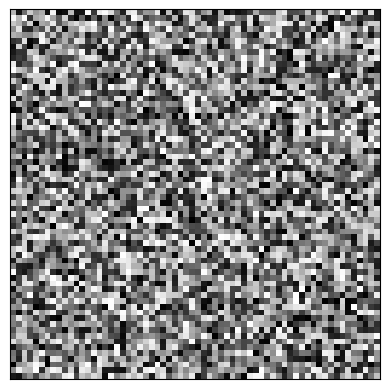

Iteration: 1, log_likelihood: -743.7469247408218
pi_list: [1.0]


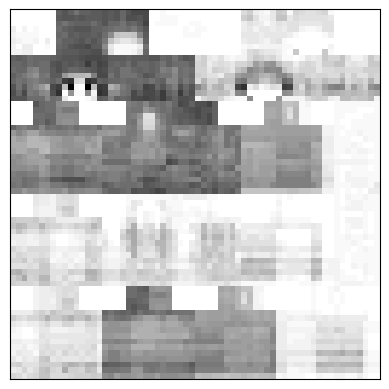

Iteration: 2, log_likelihood: -743.7469247408218
pi_list: [1.0]


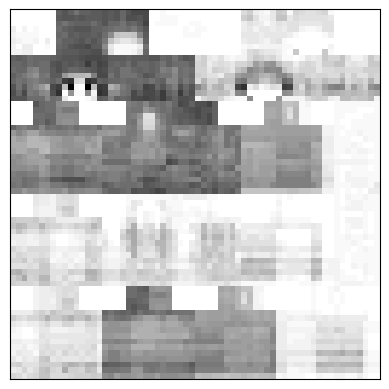

Iteration: 3, log_likelihood: -743.7469247408218
pi_list: [1.0]


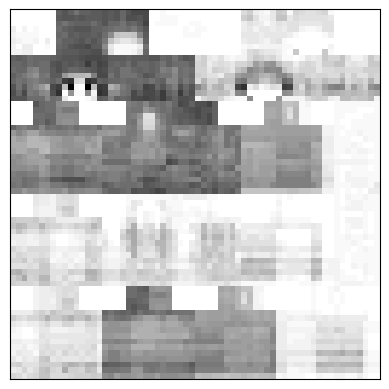

Iteration: 4, log_likelihood: -743.7469247408218
pi_list: [1.0]


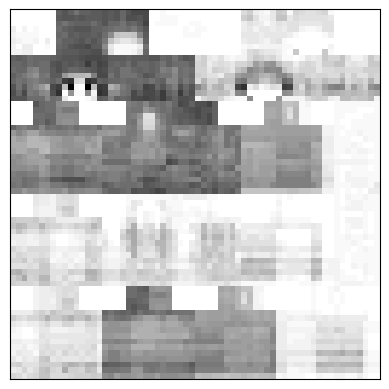

Iteration: 5, log_likelihood: -743.7469247408218
pi_list: [1.0]


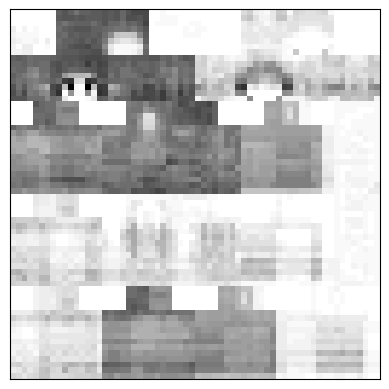

Iteration: 6, log_likelihood: -743.7469247408218
pi_list: [1.0]


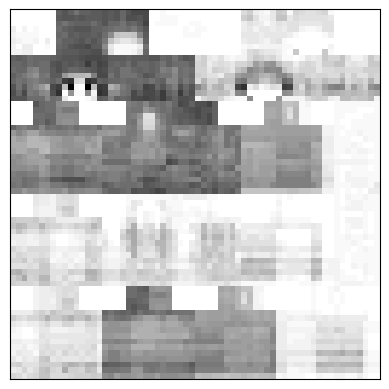

Iteration: 7, log_likelihood: -743.7469247408218
pi_list: [1.0]


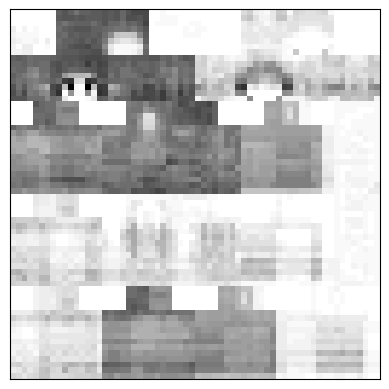

Iteration: 8, log_likelihood: -743.7469247408218
pi_list: [1.0]


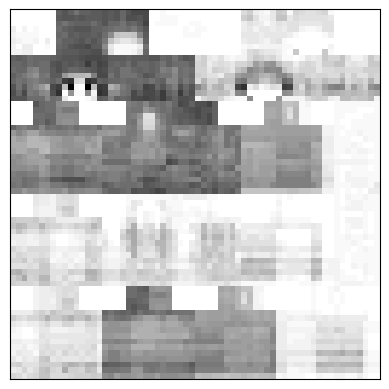

Iteration: 9, log_likelihood: -743.7469247408218
pi_list: [1.0]


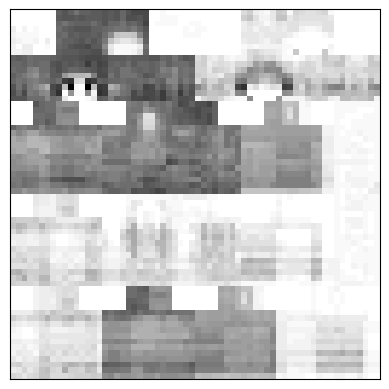

Iteration: 10, log_likelihood: -743.7469247408218
pi_list: [1.0]


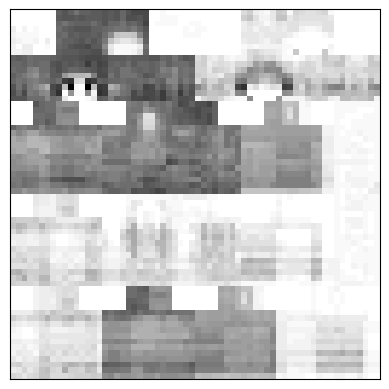

Iteration: 11, log_likelihood: -743.7469247408218
pi_list: [1.0]


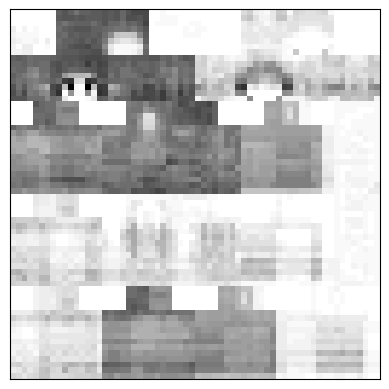

Iteration: 12, log_likelihood: -743.7469247408218
pi_list: [1.0]


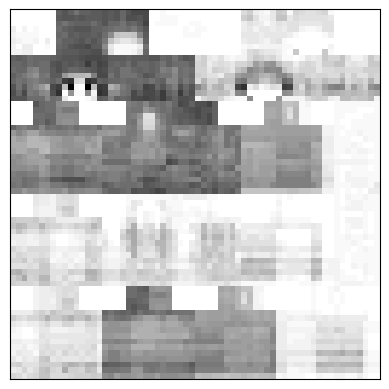

Iteration: 13, log_likelihood: -743.7469247408218
pi_list: [1.0]


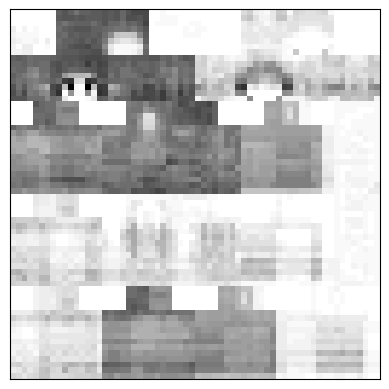

Iteration: 14, log_likelihood: -743.7469247408218
pi_list: [1.0]


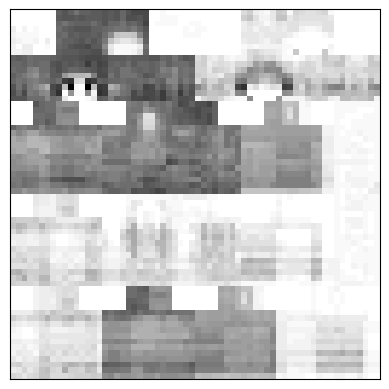

Iteration: 15, log_likelihood: -743.7469247408218
pi_list: [1.0]


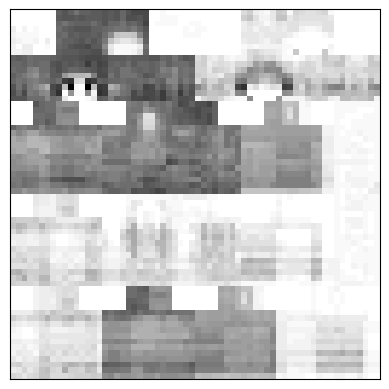

Iteration: 16, log_likelihood: -743.7469247408218
pi_list: [1.0]


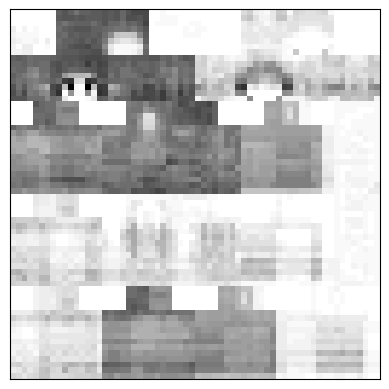

Iteration: 17, log_likelihood: -743.7469247408218
pi_list: [1.0]


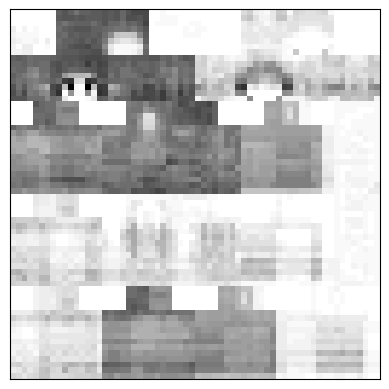

Iteration: 18, log_likelihood: -743.7469247408218
pi_list: [1.0]


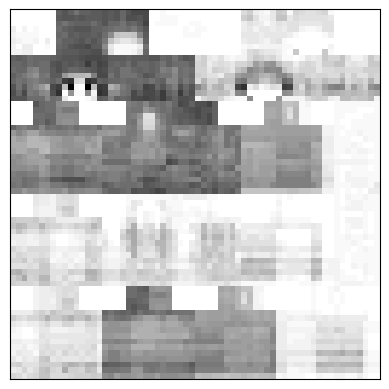

Iteration: 19, log_likelihood: -743.7469247408218
pi_list: [1.0]


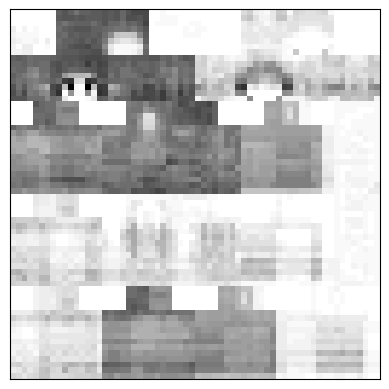

Iteration: 20, log_likelihood: -743.7469247408218
pi_list: [1.0]


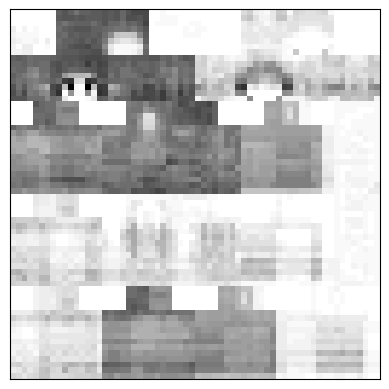

Iteration: 21, log_likelihood: -743.7469247408218
pi_list: [1.0]


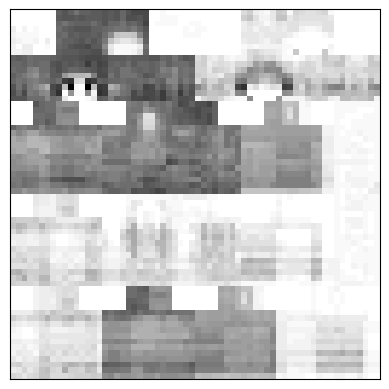

In [14]:
# 各ベルヌーイ分布のパラメータを適当な値で初期化
mu_list = [np.random.rand(binary_data.shape[1]) for _ in labels] # それぞれ ( 784, )

# 混合分布の重みを初期化
pi_list = [0.3]

n_iter = 0

# 現在のパラメータを用いて全データに対する対数尤度を計算
likely = log_likelihood(binary_data, mu_list, pi_list) / binary_data.shape[0]
print('Iteration: {0}, log_likelihood: {1}'.format(n_iter, likely))

fig = plt.figure()
for i in range(len(mu_list)):
    ax = fig.add_subplot(1, len(mu_list), i+1, xticks=[], yticks=[])
    ax.imshow(mu_list[i].reshape(64, 64), 'gray')
plt.show()

# 対数尤度の上がり幅がth以下になったら収束したと判定する
th = 0.001

# 学習
while True:
    n_iter += 1

    # Eステップ：現在のパラメータのもとでの事後分布（負担率）を計算
    gamma_mat = responsibility(binary_data, mu_list, pi_list) # ( 1800, 3 )
    n_k = np.sum(gamma_mat, axis=0) # ( 3, )

    # Mステップ：負担率を用いて，新しいパラメータを推定・更新
    # piの新しい推定量
    pi_list_next = (n_k / n_k.sum()).tolist()

    # gamma_mat: ( 1800, 3 ) binary_data: ( 1800, 784 ) n_k: ( 3, )
    mu_list_next = (binary_data.T @ gamma_mat / n_k).T

    # muの新しい推定量．0次元目だけリストになる
    mu_list_next = list(mu_list_next) # [( 784, ), ( 784, ), ( 784, )]

    mu_list = copy.deepcopy(mu_list_next)
    pi_list = copy.deepcopy(pi_list_next)

    likely_before = likely.copy()

    likely = log_likelihood(binary_data, mu_list, pi_list) / binary_data.shape[0]

    print('Iteration: {0}, log_likelihood: {1}'.format(n_iter, likely))

    delta = likely - likely_before

    print('pi_list: {}'.format(pi_list))
    # print("mu_list avg: {}".format([mu.mean() for mu in mu_list]))

    fig = plt.figure()
    for i in range(len(mu_list)):
        ax = fig.add_subplot(1, len(mu_list), i+1, xticks=[], yticks=[])
        ax.imshow(mu_list[i].reshape(64, 64), 'gray')
    plt.show()

    if delta < th and n_iter > 20:
        break